In [1]:
import zipfile
import os

def extract_zip(zip_file, extract_to):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Example usage
zip_file = '/content/archive (14) (3).zip'
extract_to = 'data'

extract_zip(zip_file, extract_to)



In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split
import torchvision.transforms as tt
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from torch.utils.data import TensorDataset

In [3]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 9)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 158MB/s]


In [4]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [5]:
classes=os.listdir(r"/content/data/pest/train")

In [6]:
classes

['bollworm',
 'grasshopper',
 'aphids',
 'mites',
 'stem_borer',
 'armyworm',
 'mosquito',
 'beetle',
 'sawfly']

In [7]:
train_data=ImageFolder(r"/content/data/pest/train",transform=tt.Compose([tt.Resize([100,100]),ToTensor()]))

In [8]:
len(train_data)

2700

In [9]:
train_data,val_data=random_split(train_data,[2500,200])

In [10]:
len(train_data),len(val_data)

(2500, 200)

In [11]:
test_data=ImageFolder(r"/content/data/pest/test",transform=tt.Compose([tt.Resize([100,100]),ToTensor()]))

In [12]:
batch_size=30
train_dl=DataLoader(train_data,batch_size,shuffle=True)
val_dl=DataLoader(val_data,batch_size,shuffle=True)

In [44]:
def display_img(img,label):
  plt.imshow(img.permute((1,2,0)))
  return classes[label]

grasshopper


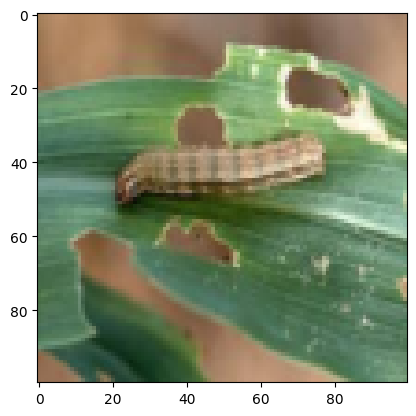

In [14]:
img,label=train_data[0]
display_img(img,label)

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torch
import torch.nn as nn
import torch.nn.functional as F
class Resnet_Arch(nn.Module):
  def __init__(self,resnet):
    super(Resnet_Arch, self).__init__()
    self.resnet=resnet
  def forward(self,img):
    x=self.resnet(img)
    return x
  def training_step(self,batch):
    img,label=batch
    # img,label=img.cuda(),label.cuda()
    pred=self(img)
    loss=F.cross_entropy(pred,label)
    acc = (torch.argmax(pred, dim=1) == label).float().mean().item()
    return loss,acc
  def validation_step(self,batch):
    img,label=batch
    pred=self(img)
    loss=F.cross_entropy(pred,label)
    acc = (torch.argmax(pred, dim=1) == label).float().mean().item()
    return loss,acc

In [16]:
train_data[0][0].shape

torch.Size([3, 100, 100])

In [17]:
model=Resnet_Arch(model)

In [18]:
model

Resnet_Arch(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
       

In [19]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [20]:
device = get_default_device()
device

device(type='cuda')

In [21]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
# to_device(model, device)

In [22]:
model=model.to(device)

In [23]:
def evaluate(model, val_loader):
    model.eval()
    val_loss=[]
    val_acc=[]
    for batch in val_loader:
      v_loss,v_acc=model.validation_step(batch)
      val_loss.append(v_loss)
      val_acc.append(v_acc)
    return val_loss,val_acc
def fit(epochs,lr,model,train_dl,val_dl,opt_func=torch.optim.SGD):
  optimizer=opt_func(model.parameters(),lr)
  result={}
  epoch_l=[]
  r_t_loss=[]
  r_t_accuracy=[]
  r_v_loss=[]
  r_v_accuracy=[]
  for epoch in range(epochs):
    model.train()
    train_losses=[]
    train_accuracy=[]
    for batch in train_dl:
      # print(batch)
      t_loss,t_acc=model.training_step(batch)
      train_losses.append(t_loss)
      train_accuracy.append(t_acc)
      t_loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    val_loss,val_acc = evaluate(model, val_dl)
    epoch_l.append(epoch)
    r_t_loss.append(torch.stack(train_losses).mean().item())
    r_t_accuracy.append(torch.tensor(train_accuracy).mean().item())
    # r_t_accuracy.append(torch.tensor(train_accuracy).mean().item())

    r_v_loss.append(torch.stack(val_loss).mean().item())
    r_v_accuracy.append(torch.tensor(val_acc).mean().item())
    print(f"epoch--->{epoch}  train_loss--->{torch.stack(train_losses).mean().item()} train_accuracy--->{torch.tensor(train_accuracy).mean().item()} val_loss--->{torch.stack(val_loss).mean().item()} val_acc--->{torch.tensor(val_acc).mean().item()}")
  result['train_loss']=r_t_loss
  result['train_acc']=r_t_accuracy
  result['val_loss']=r_v_loss
  result['val_acc']=r_v_accuracy


In [25]:
fit(10, 0.001, model, train_dl, val_dl)

epoch--->0  train_loss--->2.022331714630127 train_accuracy--->0.30198413133621216 val_loss--->1.7308571338653564 val_acc--->0.5642857551574707
epoch--->1  train_loss--->1.6078661680221558 train_accuracy--->0.6460317969322205 val_loss--->1.3677502870559692 val_acc--->0.7523810267448425
epoch--->2  train_loss--->1.2659083604812622 train_accuracy--->0.7845238447189331 val_loss--->1.104280948638916 val_acc--->0.8000000715255737
epoch--->3  train_loss--->1.0148409605026245 train_accuracy--->0.8547619581222534 val_loss--->0.8635225892066956 val_acc--->0.8904762268066406
epoch--->4  train_loss--->0.7856805324554443 train_accuracy--->0.898412823677063 val_loss--->0.6624325513839722 val_acc--->0.9166666865348816
epoch--->5  train_loss--->0.6196097731590271 train_accuracy--->0.9214285612106323 val_loss--->0.5035049915313721 val_acc--->0.9476190805435181
epoch--->6  train_loss--->0.4779340624809265 train_accuracy--->0.9488095641136169 val_loss--->0.3787969946861267 val_acc--->0.9595238566398621
e

In [26]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = img.unsqueeze(0)
    # xb = xb.to(device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return preds[0]

In [27]:
count=0
for i in range(len(test_data)):
    img,label=test_data[i]
    # print(predict_image(img, model))
    if predict_image(img, model.cpu())==test_data[i][1]:
        count=count+1

In [33]:
print("Accureacy: ",count/len(test_data)*100,"%")

Accureacy:  95.55555555555556 %


In [29]:
torch.save(model,'resnet50_weigth.pth')

In [30]:
pest_data=pd.read_csv("/content/Pesticides -lookup-untitled 26.csv")

In [31]:
pest_data

,Pest Name,Most Commonly Used Pesticides
0,Adristyrannus,"Acephate, Malathion, Permethrin"
1,Aleurocanthus spiniferus,"Imidacloprid, Acetamiprid, Chlorpyrifos"
2,alfalfa plant bug,"Imidacloprid, Lambda-cyhalothrin, Chlorpyrifos"
3,alfalfa seed chalcid,"Azadirachtin, Imidacloprid, Spinosad"
4,alfalfa weevil,"Chlorpyrifos, Cyfluthrin, Carbaryl"
...,...,...
127,wireworm,"Chlorpyrifos, Imidacloprid, Fipronil"
128,Xylotrechus,"Methoxyfenozide, Chlorpyrifos, Fipronil"
129,yellow cutworm,"Chlorpyrifos, Methomyl, Carbaryl"
130,Yellow Mite,"Spiromesifen, Abamectin, Fenazaquin"


Actual: bollworm
predicted:  bollworm


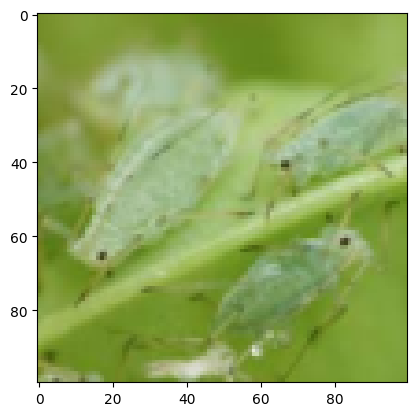

In [47]:
img,label=test_data[0]
print("Actual:",display_img(img,label))
pred_label=predict_image(img, model.cpu())
print("predicted: ",classes[pred_label])

In [71]:
 pest_data.iloc[pest_data[pest_data["Pest Name"]==classes[pred_label]].index[0]][1]

'Chlorantraniliprole, Emamectin benzoate, Spinosad, Indoxacarb'